In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

Feature shape: (784,)
Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8956 - loss: 0.3748 - val_accuracy: 0.9482 - val_loss: 0.1766
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9581 - loss: 0.1462 - val_accuracy: 0.9627 - val_loss: 0.1329
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9721 - loss: 0.0987 - val_accuracy: 0.9682 - val_loss: 0.1066
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9790 - loss: 0.0722 - val_accuracy: 0.9716 - val_loss: 0.0979
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9847 - loss: 0.0528 - val_accuracy: 0.9724 - val_loss: 0.0889
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9883 - loss: 0.0413 - val_accuracy: 0.9743 - val_loss: 0.0888
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9919 - loss: 0.0310 - val_accuracy: 0.9734 - val_loss: 0.0872
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9936 - loss: 0.0

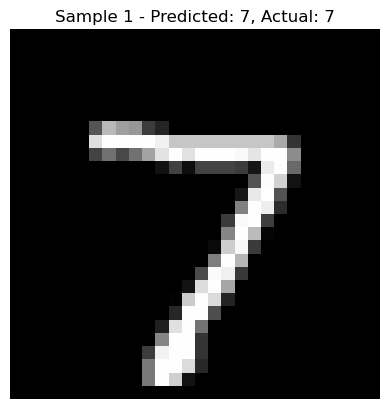

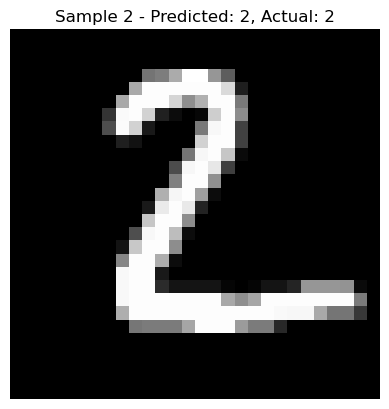

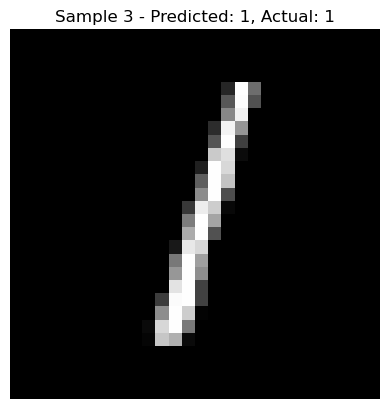

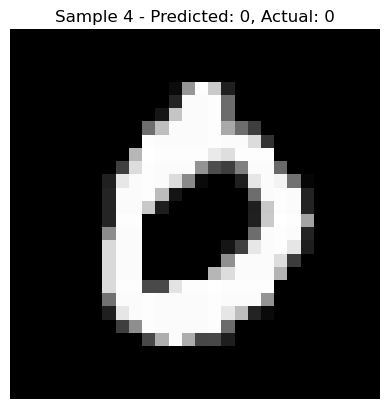

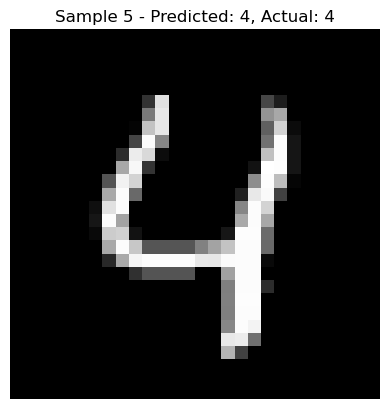

In [7]:
feature_vector_length = 784
num_classes = 10

# Load MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Flatten and normalize
X_train = X_train.reshape(X_train.shape[0], feature_vector_length).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], feature_vector_length).astype('float32') / 255

# One-hot encode labels
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

# Build model
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

# Evaluate
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}')

# Predictions
predictions = model.predict(X_test[:5])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test[:5], axis=1)

# Plot first 5 samples
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Sample {i+1} - Predicted: {predicted_classes[i]}, Actual: {true_classes[i]}")
    plt.axis('off')
    plt.show()